In this dataset, you are provided with over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.

File descriptions

    training.csv - the training set, contains the Response values
    testing.csv - the test set, you must predict the Response variable for all rows in this file
    sample_submission.csv - a sample submission file in the correct format

Data fields

Variable Description

    Id A unique identifier associated with an
    application. Product_Info_1-7 A set of normalized variables relating
    to the product applied for Ins_Age Normalized age of applicant
    Ht Normalized height of applicant Wt Normalized weight of applicant
    BMI Normalized BMI of applicant Employment_Info_1-6 A set of
    normalized variables relating to the employment history of the
    applicant. InsuredInfo_1-6 A set of normalized variables providing
    information about the applicant. Insurance_History_1-9 A set of
    normalized variables relating to the insurance history of the
    applicant. Family_Hist_1-5 A set of normalized variables relating to
    the family history of the applicant. Medical_History_1-41 A set of
    normalized variables relating to the medical history of the applicant.
    Medical_Keyword_1-48 A set of dummy variables relating to the presence
    of/absence of a medical keyword being associated with the application.
    Response This is the target variable, an ordinal

variable relating to the final decision associated with an application

The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are dummy variables.

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
insurance_data = pd.read_csv(r"insurance_data.csv")
insurance_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [3]:
# profile = pandas_profiling.ProfileReport(insurance_data)
# profile.to_file(outputfile="insurance_before_preprocessing.html")

In [4]:
insurance_data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


### Data Processing

1. Based on the preprocessing results dropping and filling following columns from the dataset.
2. Family_Hist 2,3,5 have >40% missing values
3. Family_Hist 4 is highly correlated with 2 and has large number of Missing values as well.
4. 

In [5]:
drop_Cols_List = ["Id","Family_Hist_2","Family_Hist_3","Family_Hist_4","Family_Hist_5","Insurance_History_5","Insurance_History_7",
                  "Insurance_History_9","Medical_History_10","Medical_History_15","Medical_History_24",
                  "Medical_History_32","Medical_History_35","Medical_History_36"]
fillna_Mode_List = ["Employment_Info_4","Employment_Info_6","Medical_History_1"]
dropna_Cols_list = ["Employment_Info_1"]

In [6]:
def drop_cols(drop_Cols_List):
    insurance_data.drop(columns=drop_Cols_List,axis=1,inplace=True)
    
def fillna_mode(fillna_Mode_List):
    for col in fillna_Mode_List:
        insurance_data[col] = insurance_data[col].fillna(insurance_data[col].mode()[0])

def dropna_Cols(dropna_Cols_list):
    for col in dropna_Cols_list:
        insurance_data[col].dropna(inplace=True, axis=0)

In [7]:
drop_cols(drop_Cols_List)

In [8]:
fillna_mode(fillna_Mode_List)

In [9]:
insurance_data.drop_duplicates(inplace=True,keep="first")

In [10]:
profile = pandas_profiling.ProfileReport(insurance_data)
profile.to_file(outputfile="insurance_after_preprocessing.html")

In [11]:
insurance_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,...,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000
mean,1.026336,24.415043,0.328852,2.006959,2.673755,1.043506,0.405571,0.707257,0.292571,0.469461,...,0.056969,0.010059,0.045545,0.010649,0.007515,0.013699,0.008492,0.019883,0.054492,5.636635
std,0.160134,5.073817,0.282511,0.083130,0.738961,0.291697,0.197208,0.074243,0.089037,0.122210,...,0.231785,0.099791,0.208498,0.102644,0.086363,0.116239,0.091762,0.139598,0.226988,2.456815
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


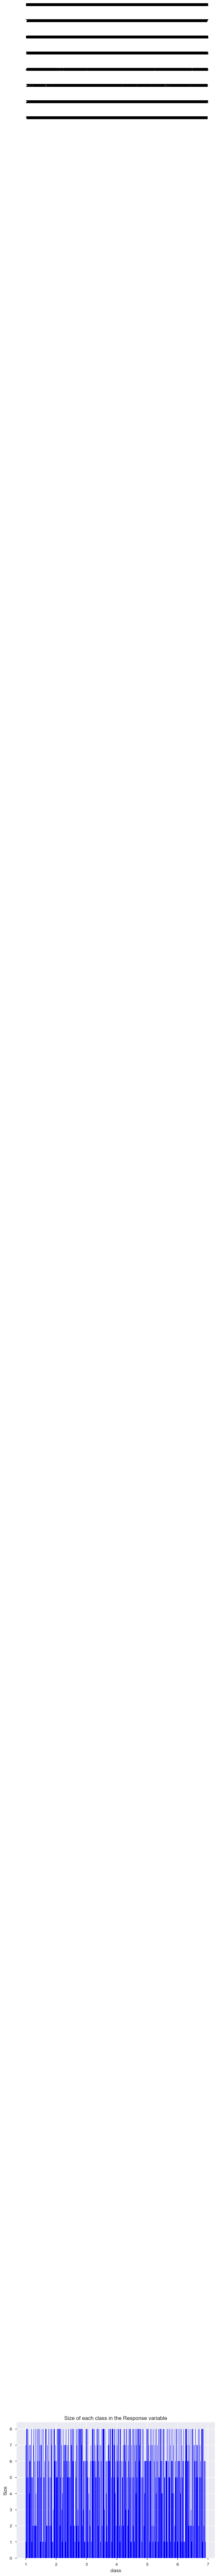

In [12]:
x = range(len(insurance_data["Response"]))
y = insurance_data["Response"]

fig, ax = plt.subplots()
ax.bar(x,y,color="blue")
ax.set_ylabel("Size")
ax.set_xlabel("class")
ax.set_title("Size of each class in the Response variable")
ax.set_xticklabels(range(9))
for i,v in enumerate(y):
    ax.text(i-0.4, v+150, str(v), color="black", fontweight="bold")
